# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Smoothing Image

Regarding filtering and blurring, actually they all belong to convolution, and only the convolution kernel is different between different filtering methods (for linear filtering).

- Low-pass filter is blur : allow low-frequency signals to pass. The edges and noise in the image are equivalent to the high-frequency part, so the low-pass filter is used to remove noise and smooth and blur the image.

- High-pass filter is sharpening : used to enhance the edge of the image and sharpen it.

Common noises include salt and pepper noise and Gaussian noise. Salt and pepper noise can be understood as spots, black or white points that randomly appear in the image; Gaussian noise can be understood as noise caused by lighting and other reasons when taking pictures. 

When you don't know what filter to use :
- Gaussian filter (cv2.GaussianBlur()) : first try this
- Average filter (cv2.blur()) : then this
- Median filter (cv2.medianBlur()) : for speckle and salt and pepper noise
- Bilateral filtering cv2.bilateralFilter() : to remove noise while retaining as much edge information as possible
- Speckle and salt and pepper noise prefer the median filter cv2.medianBlur().


- Linear filtering methods: mean filtering, box filtering, Gaussian filtering (relatively fast).
- Non-linear filtering methods: median filtering, bilateral filtering (relatively slow speed). 

### Averaging : cv2.blur() & cv2.boxFiler()

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

In [38]:
img = cv.imread('lena.jpg')
img2 = cv.blur(img, (3, 3))
# if normalize=True, equal to blur
# if you don't want to use a normalized box filter, use cv.boxFilter(). Pass an argument normalize=False to the function.
img3 = cv.boxFilter(img, ddepth=-1, ksize=(3, 3), normalize=True)
img4 = cv.boxFilter(img, ddepth=-1, ksize=(3, 3), normalize=False)

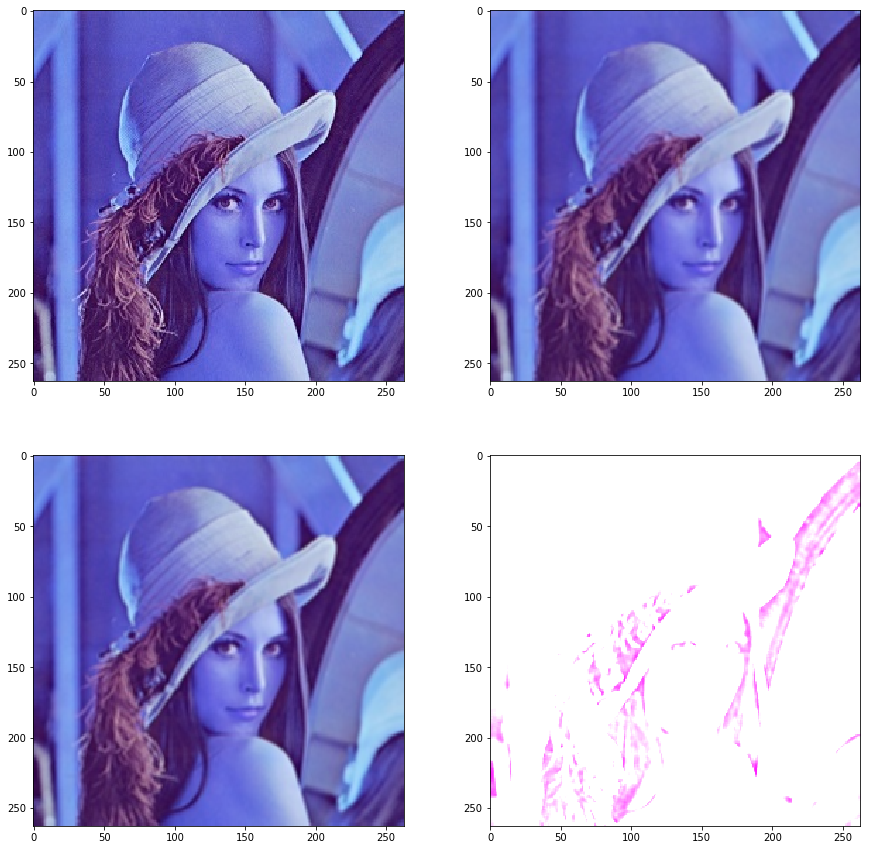

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].imshow(img)
axes[0, 1].imshow(img2)
axes[1, 0].imshow(img3)
axes[1, 1].imshow(img4)

### cv2.GaussianBlur()
- Blurring an image by a Gaussian function.
- reduce image noise and reduce detail.
- pre-processing stage in computer vision algorithms in order to enhance image structures at different scales

Argument
- ksize : specify the width and height of the kernel which should be positive and odd. 
- sigmaX and sigmaY : specify the standard deviation in the X and Y directions. 
If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

In [70]:
cv.getGaussianKernel(5, 0)

array([[0.0625],
       [0.25  ],
       [0.375 ],
       [0.25  ],
       [0.0625]])

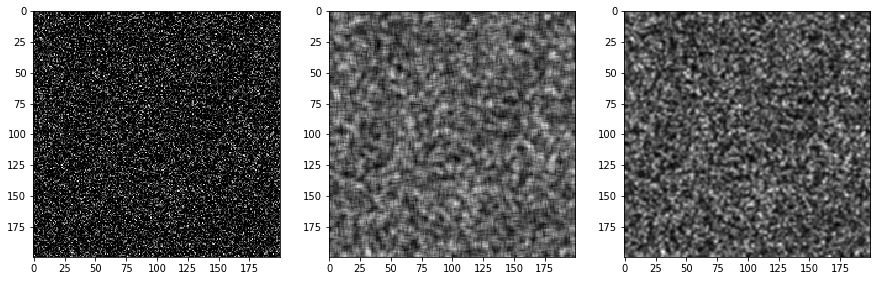

In [62]:
img = cv.imread('gaussian_noise.bmp', 0)

blur = cv.blur(img, (5, 5))
gaussian = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img, 'gray')
axes[1].imshow(blur, 'gray')
axes[2].imshow(gaussian, 'gray')

### cv2.medianBlur()
- takes the median of all the pixels under the kernel area and the central element is replaced with this median value. 
- highly effective against salt-and-pepper noise in an image. 

Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

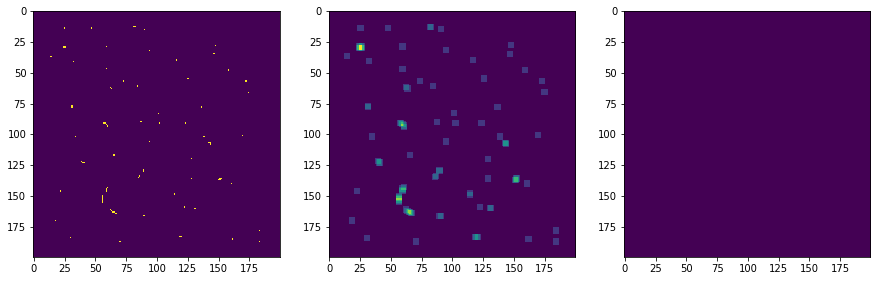

In [64]:
img = cv.imread('salt_noise.bmp', 0)
blur = cv.blur(img, (5, 5))
median = cv.medianBlur(img, 5)


fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img)
axes[1].imshow(blur)
axes[2].imshow(median)

### cv2.bilateralFilter()

cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

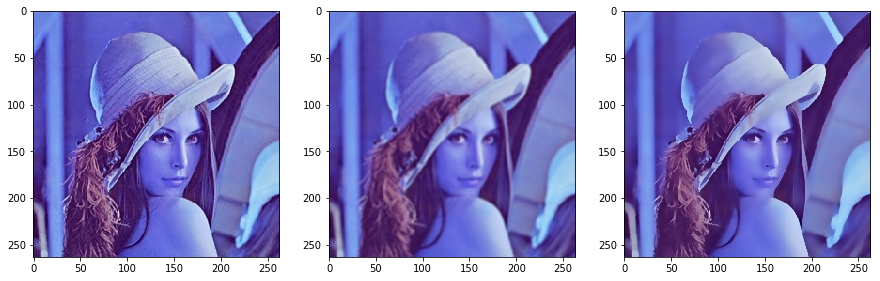

In [66]:
img = cv.imread('lena.jpg')
gau = cv.GaussianBlur(img, (5, 5), 0)
blur = cv.bilateralFilter(img, 9, 75, 75)

fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes[0].imshow(img)
axes[1].imshow(gau)
axes[2].imshow(blur)

### Image Gradients

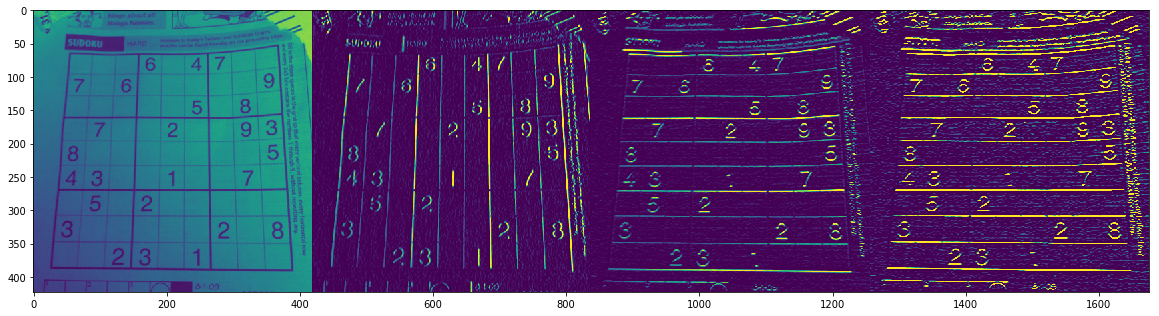

In [79]:
img = cv.imread('sudoku.jpg', 0)

# vertical
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)

dst_v = cv.filter2D(img, -1, kernel)

# horizontal
dst_h = cv.filter2D(img, -1, kernel.T)

dst_hv = cv.filter2D(dst_h, -1, kernel.T)


plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, dst_v, dst_h, dst_hv)))


Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. 

Sobel / Prewitt / Scharr

Laplacian

In [84]:
sobelx = cv.Sobel(img, -1, 1, 0, ksize=3)
sobely = cv.Sobel(img, -1, 0, 1, ksize=3)
laplacian = cv.Laplacian(img, -1)

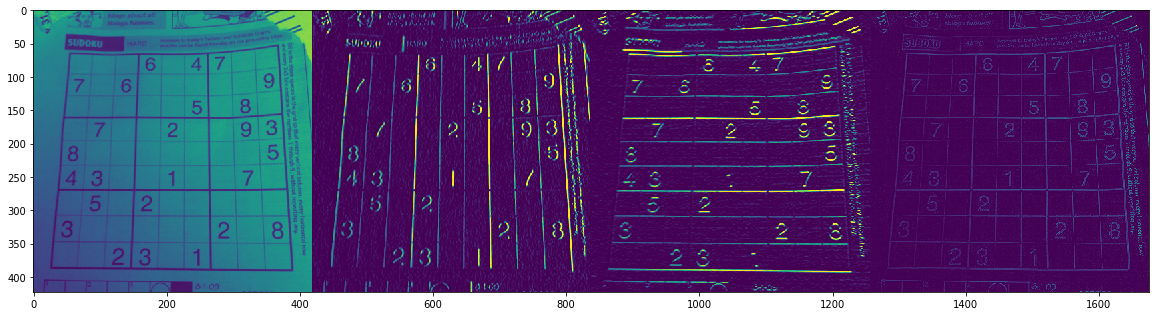

In [85]:
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, sobelx, sobely, laplacian)))

### Edge Detection

We use the low-pass filtering to blur the image. And now use high-pass filtering to shape the image

In [121]:
img = cv.imread("handwriting.jpg", 0)

# @param threshold1 first threshold for the hysteresis procedure.
# @param threshold2 second threshold for the hysteresis procedure.
# best : 2:1 and 3:1
edges1 = cv.Canny(img, threshold1=30, threshold2=70)

# split first by threshold have better result
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

edges2 = cv.Canny(thresh, 30, 70)

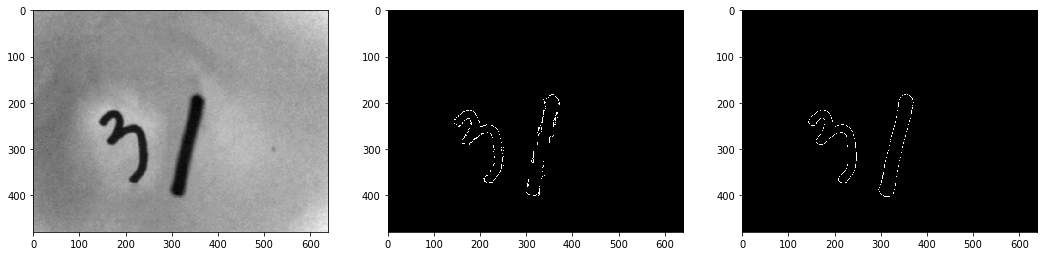

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 18))
axes[0].imshow(img, 'gray')
axes[1].imshow(edges1, 'gray')
axes[2].imshow(edges2, 'gray')

In [130]:
def track_back(x):
    pass


img = cv.imread('sudoku.jpg', 0)
cv.namedWindow('window')

cv.createTrackbar('maxVal', 'window', 100, 255, track_back)
cv.createTrackbar('minVal', 'window', 200, 255, track_back)

while(True):
    max_val = cv.getTrackbarPos('maxVal', 'window')
    min_val = cv.getTrackbarPos('minVal', 'window')

    edges = cv.Canny(img, min_val, max_val)
    cv.imshow('window', edges)

    if cv.waitKey(30) == 27:
        print(min_val, max_val)
        break
cv.destroyAllWindows()
cv.waitKey(-1)


43 77


27

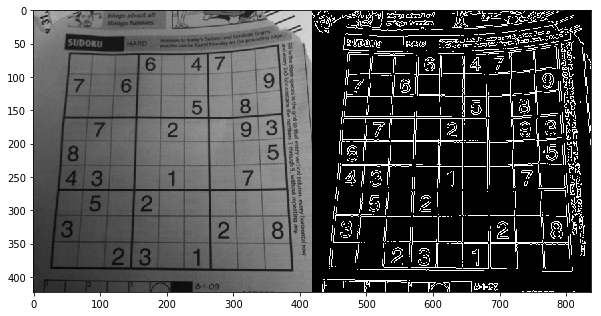

In [139]:
edges = cv.Canny(img, 43, 77)
plt.figure(figsize=(10, 10))
plt.imshow(np.hstack((img, edges)), 'gray')

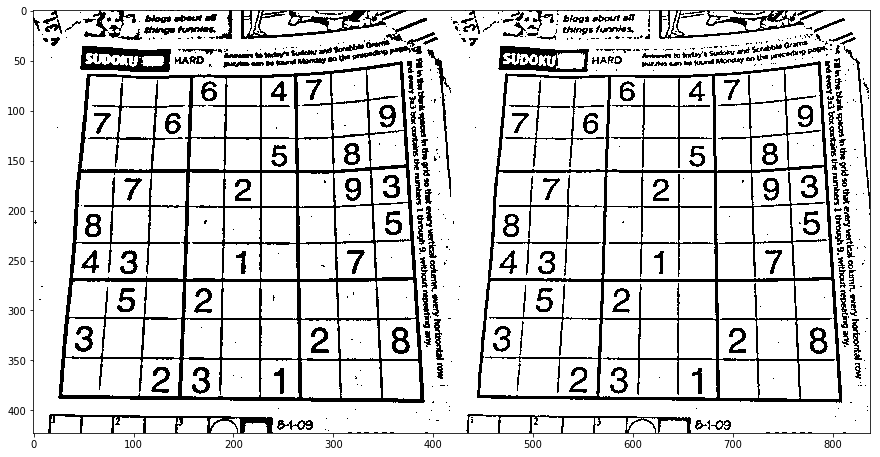

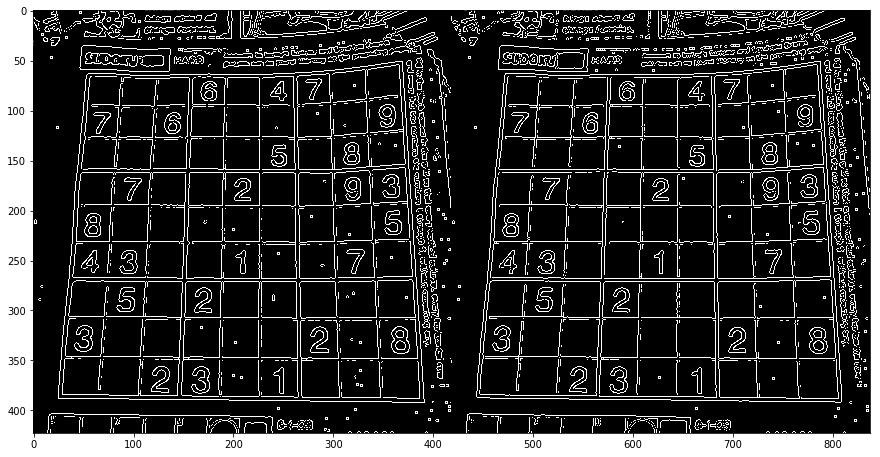

In [157]:
thres_mean = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 7)
thres_gaussian = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 7)
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack((thres_mean, thres_gaussian)), 'gray')
plt.show()

edges_tmean = cv.Canny(thres_mean, 43, 77)
edges_tgaus = cv.Canny(thres_gaussian, 43, 77)
plt.figure(figsize=(15, 15))
plt.imshow(np.hstack((edges_tmean, edges_tgaus)), 'gray')
